<a href="https://colab.research.google.com/github/varekarprajwal/Land-Price-Prediction/blob/main/LAND_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Importing required library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Import Data set (Dummy DATA)
df=pd.read_csv("data.csv")

In [ ]:
#@title Data analysis & Training
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Drop or fill missing values (example: fill with median)
df = df.fillna(df.median(numeric_only=True))

# Encode categorical variables
label_encoders = {}
categorical_cols = ["Near city", "Soil fertility", "Water Source", "Weather condtion"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature and target selection
X = df[["Area", "Near city", "Soil fertility", "Water Source", "Weather condtion", "Year"]]
y = df["Price"]

# Split data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but good practice)
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Train model
model = LinearRegression()
model.fit(train_x, train_y)

Missing values:
 Area                0
Near city           0
Soil fertility      0
Water Source        0
Weather condtion    0
Year                0
Price               0
dtype: int64


LinearRegression()

Training R²: 0.9855231519067394
Testing R²: 0.9836945765520947
RMSE: 2.9894751760531992


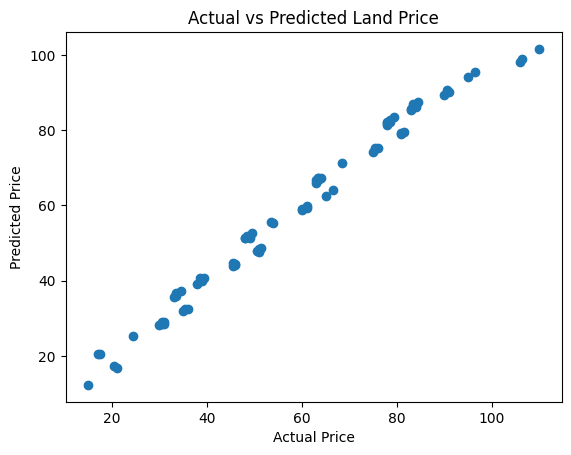

In [ ]:
#@title Score check
# Evaluate model
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

print("Training R²:", r2_score(train_y, train_pred))
print("Testing R²:", r2_score(test_y, test_pred))
print("RMSE:", np.sqrt(mean_squared_error(test_y, test_pred)))

# Plot predicted vs actual
plt.scatter(test_y, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Land Price")
plt.show()


In [ ]:
#@title Prediction of real data
# Prediction function
def predict_price(area, city, soil, water, weather, year):
    input_data = pd.DataFrame([[area, city, soil, water, weather, year]],
                              columns=["Area", "Near city", "Soil fertility", "Water Source", "Weather condtion", "Year"])
    input_scaled = scaler.transform(input_data)
    return model.predict(input_scaled)[0]

# Take user input for prediction
a = float(input("Area of the land in acre: "))
c = int(input("Land is near to city? (1 for Yes, 0 for No): "))
s = int(input("Land has fertile soil? (1 for Yes, 0 for No): "))
w = int(input("Land has water source? (1 for Yes, 0 for No): "))
r = int(input("Land has good weather? (1 for Yes, 0 for No): "))
n = int(input("Enter the year: "))

price_prediction = predict_price(a, c, s, w, r, n)
print(f"Predicted Price: ₹{price_prediction:.2f} Lakhs")

Area of the land in acre: 2
Land is near to city? (1 for Yes, 0 for No): 1
Land has fertile soil? (1 for Yes, 0 for No): 1
Land has water source? (1 for Yes, 0 for No): 0
Land has good weather? (1 for Yes, 0 for No): 0
Enter the year: 2000
Predicted Price: ₹35.14Lakhs
